In [1]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.datasets import imdb
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

Using TensorFlow backend.


## Reading the dataset

In [2]:
from pandas import read_csv
df = pd.read_csv('CREDENTIAL_LEVEL_LOOKUP_TABLE.csv',header=0, encoding='latin-1', sep = ',', names = ['label', 'content'], error_bad_lines=False)

In [3]:
df.head(5)

,label,content
0,Bachelors Degree,A
1,Bachelors Degree,B
2,Bachelors Degree,S
3,Masters Degree,.
4,Masters Degree,D


In [4]:
x1= df['content']
x1.head(5)

0    A
1    B
2    S
3    .
4    D
Name: content, dtype: object

In [ ]:
vectorizer_CountVectorizer = CountVectorizer(lowercase = False, min_df=0, token_pattern=(r'\w+'))
vectorizer_CountVectorizer.fit(x1)
vectorizer_CountVectorizer.vocabulary_

In [ ]:
x1_CountVectorizer_array=vectorizer_CountVectorizer.transform(x1).toarray()
np.set_printoptions(threshold=np.inf)
print(x1_CountVectorizer_array.shape)
print(x1_CountVectorizer_array)   ##(60, 65)

In [ ]:
len(vectorizer_CountVectorizer.vocabulary_)

In [ ]:
x2= df['content']
x2 = x2.apply(str)
x2.head(5)


In [ ]:
x2.shape

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
tokenizer_sequences = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, document_count=0)
## tokenize it to words
tokenizer_sequences.fit_on_texts(x2)
## change each word to a value
sequences = tokenizer_sequences.texts_to_sequences(x2)
print("The sequences generated from text are : ",sequences)


In [ ]:
len(sequences)

In [ ]:
x2_tokenizer_sequences = tokenizer_sequences.sequences_to_matrix(sequences, mode='binary')
print(x2_tokenizer_sequences)

In [ ]:
x2_tokenizer_sequences.shape

In [5]:
x4= df['content']

In [6]:
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, document_count=0)
## tokenize it to words
tokenizer.fit_on_texts(x4)

# Get our training data word index
word_index = tokenizer.word_index

# Encode training data sentences into sequences
x4_sequences = tokenizer.texts_to_sequences(x4)

# Get max training sequence length
maxlen = max([len(x) for x in x4_sequences])

# Pad the training sequences
x4_pad_sequences = pad_sequences(x4_sequences, padding="post", truncating='post', maxlen=maxlen)

# Output the results of our work
print("Word x2:\n", x4.head(5))
print("Word index:\n", word_index)
print("\nTraining sequences:\n", x4_sequences)
print("\nmaxlen:\n", maxlen)
print("\nPadded training sequences:\n", x4_pad_sequences)
print("\nPadded training shape:", x4_pad_sequences.shape)
print("Training sequences data type:", type(x4_sequences))
print("Padded Training sequences data type:", type(x4_pad_sequences))

Word x2:
 0    A
1    B
2    S
3    .
4    D
Name: content, dtype: object
Word index:
 {'of': 1, 'in': 2, 'certificate': 3, 'science': 4, 'bachelor': 5, 'cert': 6, 'arts': 7, 'master': 8, 'provisional': 9, 'and': 10, 'associate': 11, 'aas': 12, 'studies': 13, 'business': 14, 'secondary': 15, 'teaching': 16, 'education': 17, 'for': 18, 'technology': 19, 'elementary': 20, 'tech': 21, 'engineering': 22, 'teacher': 23, 'professional': 24, 'management': 25, 'sci': 26, 's': 27, 'applied': 28, 'health': 29, 'administration': 30, 'english': 31, 'assoc': 32, 'b': 33, 'bs': 34, 'a': 35, 'computer': 36, 'sciences': 37, 'aa': 38, 'nursing': 39, 'standard': 40, 'admin': 41, 'ncate': 42, 'degree': 43, 'st': 44, 'teach': 45, 'history': 46, 'general': 47, 'medical': 48, 'diploma': 49, 'comp': 50, 'ing': 51, 'ata': 52, '12': 53, 'design': 54, '1': 55, 'accred': 56, 'w': 57, 'ms': 58, 'as': 59, 'doctor': 60, 'art': 61, 'with': 62, 'm': 63, 'i': 64, 'field': 65, 'bus': 66, 'office': 67, 'physical': 68, '

In [8]:
# the classes involved in the sentiments a.k.a target
df['label']=df['label'].astype(str)


In [9]:
# we now convert the sentiments into numeric for the machine to understand

from sklearn.preprocessing import LabelEncoder

# now call the class encoder and assign it to a variable, then finally transform

le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df.head(5)

,label,content
0,1,A
1,1,B
2,1,S
3,4,.
4,4,D


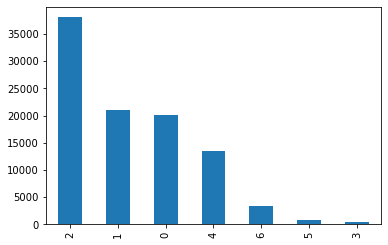

In [10]:
df = df[df.label.apply(lambda x: x !="nan")] 
df = df.reset_index(drop=True)
df['label'].value_counts().plot(kind='bar')

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x4_pad_sequences, df['label'], test_size = 0.1, random_state = 5, stratify = df['label'])
x_train

array([[   3,    1, 8906, ...,    0,    0,    0],
       [  87,    2,    7, ...,    0,    0,    0],
       [   8,    1,   31, ...,    0,    0,    0],
       ...,
       [   5,    1,    7, ...,    0,    0,    0],
       [   6,  451,  171, ...,    0,    0,    0],
       [ 261,  129, 1024, ...,    0,    0,    0]])

In [13]:
train_input = x_train.reshape((x_train.shape[0], x_train.shape[1],1))
train_input.shape
text_input = x_test.reshape((x_test.shape[0], x_test.shape[1],1))
text_input.shape

(9741, 16, 1)

In [14]:
model = Sequential()
model.add(LSTM(units=20,activation='relu', input_shape=(train_input.shape[1], train_input.shape[2]), return_sequences=True, go_backwards=True))
model.add(LSTM(units=20,activation='relu', return_sequences=False, go_backwards=True))
model.add(Dense(88, activation='relu'))
model.add(Dropout(rate=.3))
model.add(Dense(1, activation='sigmoid'))

In [15]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 16, 20)            1760      
_________________________________________________________________
lstm_2 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense_1 (Dense)              (None, 88)                1848      
_________________________________________________________________
dropout_1 (Dropout)          (None, 88)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 89        
Total params: 6,977
Trainable params: 6,977
Non-trainable params: 0
_________________________________________________________________
None


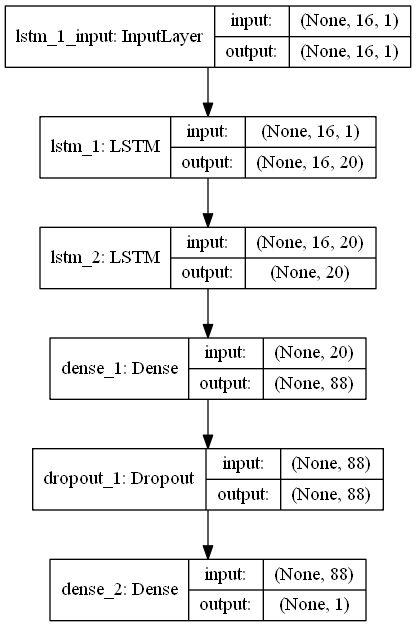

In [16]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image(filename = "model.png")

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_input, y_train,  epochs=20, validation_split=0.2)

Train on 70134 samples, validate on 17534 samples
Epoch 1/20
70134/70134 [==============================] - 31s 446us/step - loss: nan - accuracy: 0.0183 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/20
70134/70134 [==============================] - 30s 435us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/20
70134/70134 [==============================] - 30s 422us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/20
70134/70134 [==============================] - 29s 415us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/20
70134/70134 [==============================] - 29s 412us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/20
70134/70134 [==============================] - 29s 411us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/20
70134/70134 [========================

In [18]:
loss, accuracy = model.evaluate(train_input, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(text_input, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.0000
Testing Accuracy:  0.0000


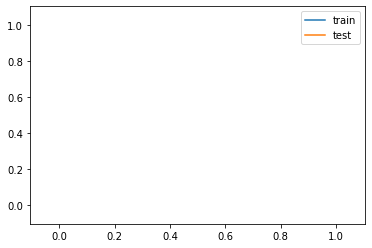

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
model = Sequential() 
model.add(Embedding(vocabulary, 500, input_length=num_steps)) 
model.add(LSTM(hidden_size, return_sequences=True))
 model.add(LSTM(hidden_size, return_sequences=True)) 
if use_dropout: model.add(Dropout(0.5)) 
model.add(TimeDistributed(Dense(vocabulary))) 
model.add(Activation('softmax'))

In [ ]:
tokenizer = Tokenizer(num_words=50000)
X_train = tokenizer.sequences_to_matrix(X_train, mode='binary')
X_test = tokenizer.sequences_to_matrix(X_test, mode='binary')
y_train = keras.utils.to_categorical(y_train,num_classes=46)
y_test = keras.utils.to_categorical(y_test,num_classes=46)


model = Sequential()
model.add(tf.keras.layers.Dense(128,input_shape=(X_train[0].shape)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(tf.keras.layers.Dense(46, activation='softmax'))

print(model.summary())

model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=64,epochs=10)

model.evaluate(X_test,y_test)
